<a href="https://colab.research.google.com/github/superbunny38/Projects/blob/main/PhotoRestoration/Transfer_learning_Training_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Background:<br>
**We succeeded training for two respective times: 
one time with 50 images in one folder(50*3 folders = 150 images in total) and the other with 500 images in one folder(500*3 folders = 1500 images in total)**
<br>
However, the outcome of both training was <u>insufficient</u>(the performance of trained model was not great). We are assuming that it might be because the dataset size is too small compared to the authors' work.
Therefore, to get the sufficient outcome, we used pre-trained weights and biases of the authors' work until training domain B, and trained our own mapping with it.

## Cloning from github
We cloned this from github but made modifications to the following files:
- train_domain_A.py
- train_domain_B.py
- train_mapping.py
- online_dataset_for_old_photos.py
- create_bigfile.py

And made the following modifications to the trainning command
- GPU ID: 0
- batchSize: 10

In [ ]:
!git clone https://github.com/sofiavegaz/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 535, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 535 (delta 116), reused 120 (delta 63), pack-reused 314
Receiving objects: 100% (535/535), 44.86 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (232/232), done.


In [ ]:
%cd photo_restoration/
!git pull
%cd ..

/content/photo_restoration
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/sofiavegaz/Bringing-Old-Photos-Back-to-Life
   f947019..a55aa45  master     -> origin/master
Updating f947019..a55aa45
Fast-forward
 Global/train_mapping.py | 20 ++++++++++----------
 1 file changed, 10 insertions(+), 10 deletions(-)
/content


##Installing requisites

In [ ]:
%cd photo_restoration/Face_Enhancement/models/networks/
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

%cd Face_Enhancement/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/face_checkpoints.zip
!unzip face_checkpoints.zip
%cd ../
%cd Global/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/global_checkpoints.zip
!unzip global_checkpoints.zip
%cd ../
%cd ..
!ls

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 1.18 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 1.24 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2021-12-01 14:24:53--  http://dlib.net/files/shape_predictor_68_face_landmark

In [ ]:
!pip install -r photo_restoration/requirements.txt

     |████████████████████████████████| 124 kB 6.7 MB/s 
     |████████████████████████████████| 394 kB 43.0 MB/s 


##Getting input from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp -r drive/MyDrive/IDL_final_project/inputs.zip ./
!unzip inputs.zip

Archive:  inputs.zip
   creating: inputs/
  inflating: __MACOSX/._inputs       
   creating: inputs/Real_RGB_old/
  inflating: __MACOSX/inputs/._Real_RGB_old  
   creating: inputs/Real_L_old/
  inflating: __MACOSX/inputs/._Real_L_old  
   creating: inputs/VOC_RGB_JPEGImages/
  inflating: __MACOSX/inputs/._VOC_RGB_JPEGImages  
  inflating: inputs/Real_RGB_old/images26.jpg  
  inflating: __MACOSX/inputs/Real_RGB_old/._images26.jpg  
  inflating: inputs/Real_RGB_old/images32.jpg  
  inflating: __MACOSX/inputs/Real_RGB_old/._images32.jpg  
  inflating: inputs/Real_RGB_old/images33.jpg  
  inflating: __MACOSX/inputs/Real_RGB_old/._images33.jpg  
  inflating: inputs/Real_RGB_old/images25.jpg  
  inflating: __MACOSX/inputs/Real_RGB_old/._images25.jpg  
  inflating: inputs/Real_RGB_old/images19.jpg  
  inflating: __MACOSX/inputs/Real_RGB_old/._images19.jpg  
  inflating: inputs/Real_RGB_old/images20.jpg  
  inflating: __MACOSX/inputs/Real_RGB_old/._images20.jpg  
  inflating: inputs/Real_RGB_o

##Creating .bigfile

In [ ]:
!python photo_restoration/Global/data/Create_Bigfile.py

write 0 images done
write 0 images done
write 0 images done


##Train mapping

In [ ]:
!python photo_restoration/Global/train_mapping.py --use_v2_degradation --training_dataset mapping --use_vae_which_epoch 200 --continue_train --name mapping_quality --label_nc 0 --loadSize 256 --fineSize 256 --dataroot output_bigfile --no_instance --resize_or_crop crop_only --batchSize 12 --no_html --gpu_ids 0 --nThreads 8 --load_pretrainA /content/photo_restoration/Global/checkpoints/restoration/VAE_A_quality --load_pretrainB /content/photo_restoration/Global/checkpoints/restoration/VAE_B_quality --l2_feat 60 --n_downsample_global 3 --mc 64 --k_size 4 --start_r 1 --mapping_n_block 6 --map_mc 512 --use_l1_feat --niter 150 --niter_decay 100 --outputs_dir outputs_mapping --checkpoints_dir /content/photo_restoration/Global/checkpoints/restoration

Resuming from epoch 0 at iteration 0
CustomDatasetDataLoader
dataset [PairOldPhotos] was created
start load bigfile (0.00 GB) into memory
find total 50 images
load 0 images done
load all 50 images done
-------------Filter the imgs whose size <256 in VOC-------------
--------Origin image num is [50], filtered result is [50]--------
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
#training images = 48
Mapping: You are using the mapping model without global restoration.
/content/photo_restoration/Global/checkpoints/restoration/VAE_A_quality/200_net_G.pth not exists yet!
/content/photo_res

##Test with our own images

In [ ]:
%cd photo_restoration/Global/
!python test.py --Quality_restore --test_input ../../drive/MyDrive/IDL_final_project/test_img --outputs_dir outputs_final_3
%cd ../../

/content/photo_restoration/Global
Mapping: You are using the mapping model without global restoration.
Now you are processing GMC-0939_141.jpeg
Now you are processing GMC-0949_141.jpeg
Now you are processing GMC-0962.jpeg
Now you are processing GMC-0970.jpeg
/content


In [ ]:
!cp -r /content/photo_restoration/Global/checkpoints drive/MyDrive/IDL_final_project/
!cp -r /content/photo_restoration/Global/outputs_final_3 drive/MyDrive/IDL_final_project/

In [ ]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

GMC-0939_141.jpeg


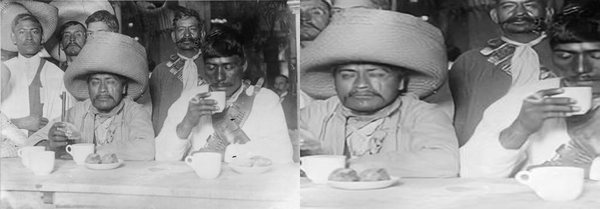

GMC-0949_141.jpeg


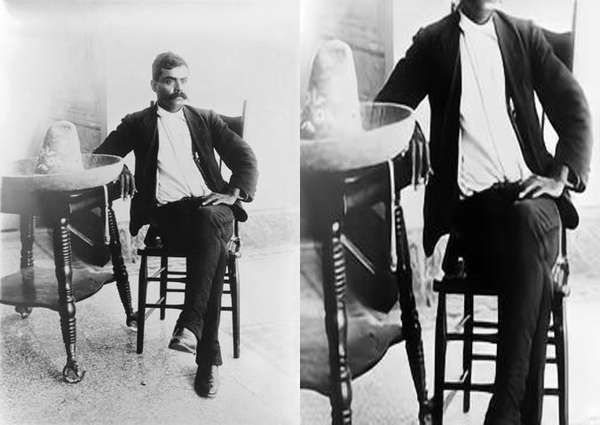

GMC-0962.jpeg


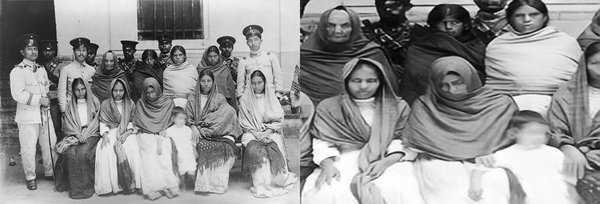

GMC-0970.jpeg


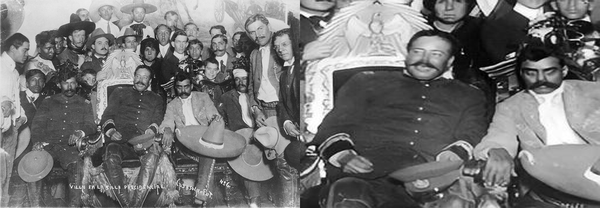

In [ ]:
dir = "drive/MyDrive/IDL_final_project/outputs_final_3/restored_image/"
import os

filenames = os.listdir(os.path.join(dir))
filenames.sort()

input_path = "drive/MyDrive/IDL_final_project/test_img"
output_path = dir
for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, filename))

    display(make_grid(image_original, image_restore))